import all the relevant libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats
import io
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


upload the db file

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


read the file and create data frame

In [ ]:
df=pd.read_excel("/content/gdrive/My Drive/Colab Notebooks/MS_Notebooks/MS_data_SecondDB_Colab.xlsx", header=None, skiprows=1, names=['sample_code','gender','age_at_diagnosis', 'diagnosis', 'diagnosis_status', 'primary_EDSS_at_diagnosis', 'num_of_medicine_changed', 'MRI_lesion_mass', 'oligoclonal_band', 'TIGIT_RQ','TIM3_RQ', 'LAG3_RQ','PD-1_RQ', 'RQ CTLA-4','1_years_EDSS_from_sample_date', '3_years_from_sample', '5_years_from_sample', 'EDSS_post_10_years'  ])
# remove empty rows
df = df.dropna(how='all')
# Print the first 10 rows of the data set
print(df.head(10))
# Get summary of numerical variables
print(df.describe())

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

remove white space before and after the word:

In [ ]:
df = df.applymap(lambda x: x.strip() if type(x)==str else x)

Fix string values to upperCase

In [ ]:
df['gender'] = df['gender'].str.upper()
df['diagnosis'] = df['diagnosis'].str.upper()
df['oligoclonal_band'] = df['oligoclonal_band'].str.upper()
df['diagnosis_status'] = df['diagnosis_status'].str.upper()

global variable for number of rows

In [ ]:
count_row = df.shape[0]
count_row

57

Normalize the MRI cloumn

In [ ]:
df

In [ ]:
df['MRI_lesion_mass'] = df['MRI_lesion_mass']/1000

In [ ]:
df

replace 'uk' and 'ND' to 'Nan'

In [ ]:
df = df.replace({'UK': np.nan, 'uk': np.nan, 'ND': np.nan})

In [ ]:
df.to_csv('dfNoUK.csv',index=False)

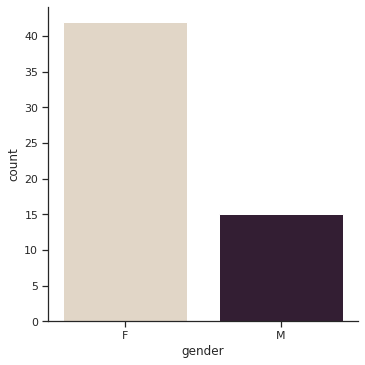

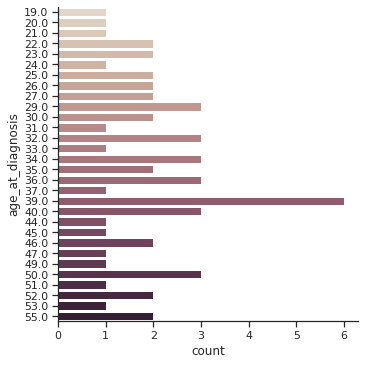

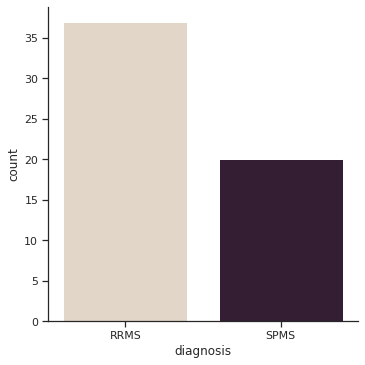

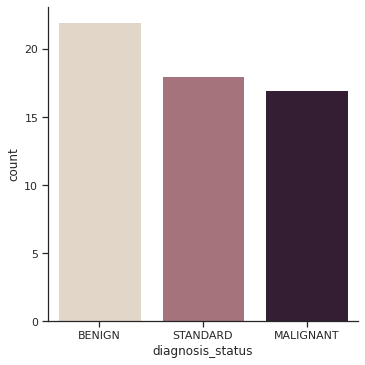

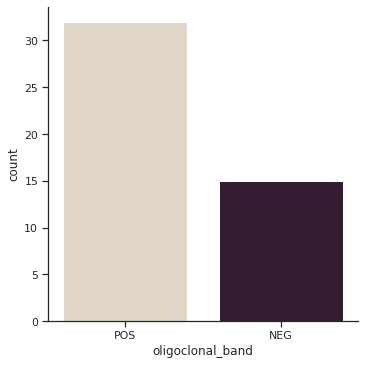

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks", color_codes=True)
sns.catplot(x="gender", kind="count", palette="ch:.25", data=df)
sns.catplot(y="age_at_diagnosis", kind="count", palette="ch:.25", data=df)
sns.catplot(x="diagnosis", kind="count", palette="ch:.25", data=df)
sns.catplot(x="diagnosis_status", kind="count", palette="ch:.25", data=df)
sns.catplot(x="oligoclonal_band", kind="count", palette="ch:.25", data=df)


# # df['sample_code'].fillna(stats.mode(df['diagnosis']), inplace=True)
# df['gender'].fillna(stats.mode(df['gender']), inplace=True)
# df['age_at_diagnosis'].fillna(stats.mode(df['age_at_diagnosis']), inplace=True)
# df['diagnosis'].fillna(stats.mode(df['diagnosis']), inplace=True)
# df['diagnosis_status'].fillna(stats.mode(df['diagnosis_status']), inplace=True)
# df['oligoclonal_band'].fillna(stats.mode(df['oligoclonal_band']), inplace=True),




In [ ]:
df.to_excel('dfcheck.xlsx',index=False)

In [ ]:
# # df['num_of_medicine_changed'].fillna(stats.median(df['num_of_medicine_changed']), inplace=True)
# # df['MRI_lesion_mass'].fillna(stats.median(df['MRI_lesion_mass']), inplace=True)
# df['primary_EDSS_at_diagnosis'].fillna(stats.median(df['primary_EDSS_at_diagnosis']), inplace=True)
# df['TIM3_RQ'].fillna(stats.median(df['TIM3_RQ']), inplace=True)
# df['TIGIT_RQ'].fillna(stats.median(df['TIGIT_RQ']), inplace=True)
# df['LAG3_RQ'].fillna(stats.median(df['LAG3_RQ']), inplace=True)
# df['RQ CTLA-4'].fillna(stats.median(df['RQ CTLA-4']), inplace=True)
# df['1_years_EDSS_from_sample_date'].fillna(stats.median(df['1_years_EDSS_from_sample_date']), inplace=True)
# df['3_years_from_sample'].fillna(stats.median(df['3_years_from_sample']), inplace=True)
# df['5_years_from_sample'].fillna(stats.median(df['5_years_from_sample']), inplace=True)
# # df['EDSS_post_10_years'].fillna(stats.median(df['EDSS_post_10_years']), inplace=True)


print('num_of_medicine_changed')
max_value = df['num_of_medicine_changed'].max() 
print(max_value)
min_value = df['num_of_medicine_changed'].min() 
print(min_value)


print('MRI_lesion_mass')
max_value = df['MRI_lesion_mass'].max() 
print(max_value)
min_value = df['MRI_lesion_mass'].min() 
print(min_value)


print('primary_EDSS_at_diagnosis')
max_value = df['primary_EDSS_at_diagnosis'].max() 
print(max_value)
min_value = df['primary_EDSS_at_diagnosis'].min() 
print(min_value)

print('TIM3_RQ')
max_value = df['TIM3_RQ'].max() 
print(max_value)
min_value = df['TIM3_RQ'].min() 
print(min_value)


print('TIGIT_RQ')
max_value = df['TIGIT_RQ'].max() 
print(max_value)
min_value = df['TIGIT_RQ'].min() 
print(min_value)


print('LAG3_RQ')
max_value = df['LAG3_RQ'].max() 
print(max_value)
min_value = df['LAG3_RQ'].min() 
print(min_value)


print('RQ CTLA-4')
max_value = df['PD-1_RQ'].max() 
print(max_value)
min_value = df['PD-1_RQ'].min() 
print(min_value)


print('1_years_EDSS_from_sample_date')
max_value = df['1_years_EDSS_from_sample_date'].max() 
print(max_value)
min_value = df['1_years_EDSS_from_sample_date'].min() 
print(min_value)



print('3_years_from_sample')
max_value = df['3_years_from_sample'].max() 
print(max_value)
min_value = df['3_years_from_sample'].min() 
print(min_value)


print('5_years_from_sample')
max_value = df['5_years_from_sample'].max() 
print(max_value)
min_value = df['5_years_from_sample'].min() 
print(min_value)


print('EDSS_post_10_years')
max_value = df['EDSS_post_10_years'].max() 
print(max_value)
min_value = df['EDSS_post_10_years'].min() 
print(min_value)

print('age_at_diagnosis')
max_value = df['age_at_diagnosis'].max() 
print(max_value)
min_value = df['age_at_diagnosis'].min() 
print(min_value)


num_of_medicine_changed
5.0
0.0
MRI_lesion_mass
104.776
0.144
primary_EDSS_at_diagnosis
4.5
0.0
TIM3_RQ
4.498309339
0.263163022
TIGIT_RQ
2.963221522
0.110563781
LAG3_RQ
6.850679064
0.408769115
RQ CTLA-4
8.080632341
0.169982927
1_years_EDSS_from_sample_date
5.5
0.0
3_years_from_sample
7.0
0.0
5_years_from_sample
7.5
0.0
EDSS_post_10_years
7.5
0.0
age_at_diagnosis
55.0
19.0


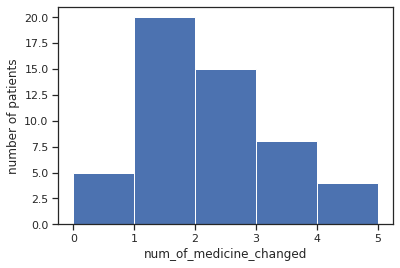

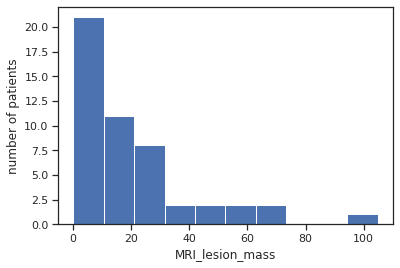

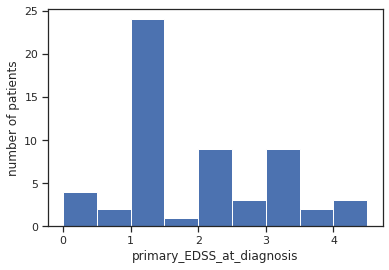

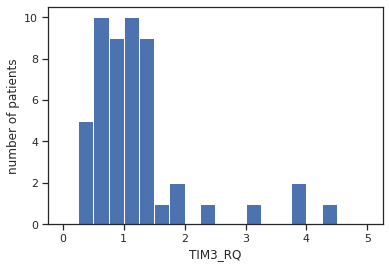

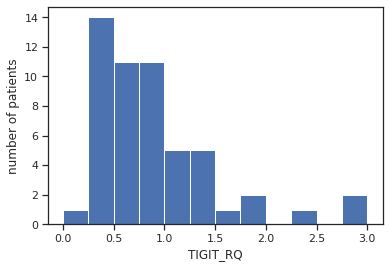

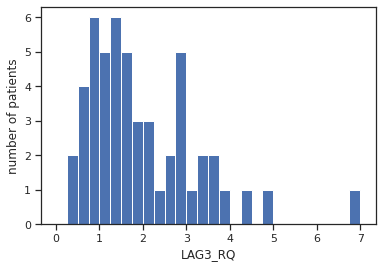

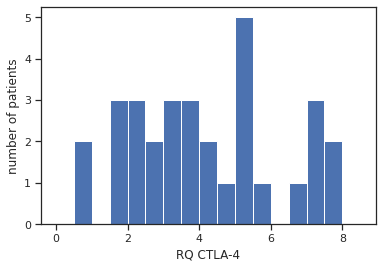

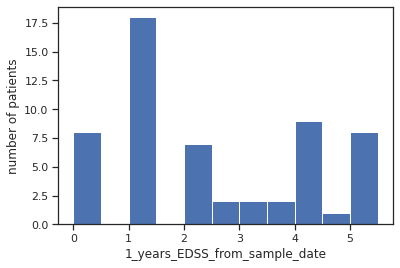

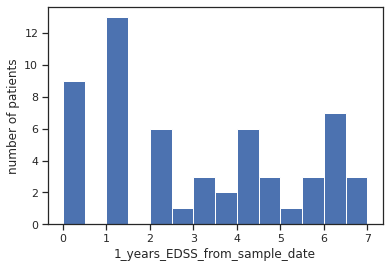

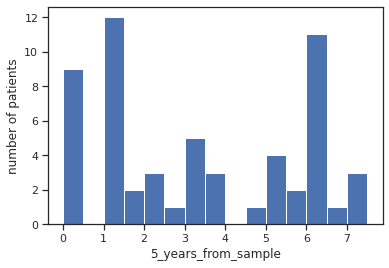

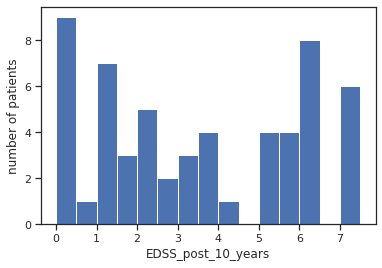

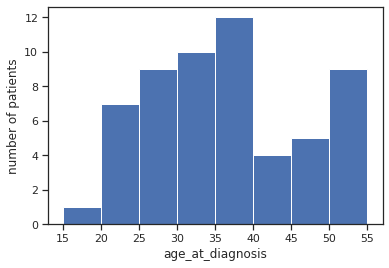

In [ ]:
# # df['num_of_medicine_changed'].fillna(stats.median(df['num_of_medicine_changed']), inplace=True)
# # df['MRI_lesion_mass'].fillna(stats.median(df['MRI_lesion_mass']), inplace=True)
# df['primary_EDSS_at_diagnosis'].fillna(stats.median(df['primary_EDSS_at_diagnosis']), inplace=True)
# df['TIM3_RQ'].fillna(stats.median(df['TIM3_RQ']), inplace=True)
# df['TIGIT_RQ'].fillna(stats.median(df['TIGIT_RQ']), inplace=True)
# df['LAG3_RQ'].fillna(stats.median(df['LAG3_RQ']), inplace=True)
# df['RQ CTLA-4'].fillna(stats.median(df['RQ CTLA-4']), inplace=True)
# df['1_years_EDSS_from_sample_date'].fillna(stats.median(df['1_years_EDSS_from_sample_date']), inplace=True)
# df['3_years_from_sample'].fillna(stats.median(df['3_years_from_sample']), inplace=True)
# df['5_years_from_sample'].fillna(stats.median(df['5_years_from_sample']), inplace=True)
# # df['EDSS_post_10_years'].fillna(stats.median(df['EDSS_post_10_years']), inplace=True)



degrees = df['num_of_medicine_changed']
plt.hist(degrees, bins=[0, 1, 2, 3, 4, 5 ])
# plt.title('num_of_medicine_changed')
plt.xlabel('num_of_medicine_changed')
plt.ylabel('number of patients')
plt.show()


degrees = df['MRI_lesion_mass']
plt.hist(degrees)
# plt.title('MRI_lesion_mass')
plt.xlabel('MRI_lesion_mass')
plt.ylabel('number of patients')
plt.show()


degrees = df['primary_EDSS_at_diagnosis']
plt.hist(degrees, bins=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5])
# plt.title('primary_EDSS_at_diagnosis')
plt.xlabel('primary_EDSS_at_diagnosis')
plt.ylabel('number of patients')
plt.show()


degrees = df['TIM3_RQ']
plt.hist(degrees, bins=[0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4, 4.25, 4.5, 4.75, 5])
# plt.title('TIM3_RQ')
plt.xlabel('TIM3_RQ')
plt.ylabel('number of patients')
plt.show()


degrees = df['TIGIT_RQ']
plt.hist(degrees, bins=[0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3])
# plt.title('TIGIT_RQ')
plt.xlabel('TIGIT_RQ')
plt.ylabel('number of patients')
plt.show()


degrees = df['LAG3_RQ']
plt.hist(degrees, bins=[0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4, 4.25, 4.5, 4.75, 5, 5.25, 5.5, 5.75, 6, 6.25, 6.5, 6.75, 7])
# plt.title('LAG3_RQ')
plt.xlabel('LAG3_RQ')
plt.ylabel('number of patients')
plt.show()



degrees = df['RQ CTLA-4']
plt.hist(degrees, bins=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5])
# plt.title('RQ CTLA-4')
plt.xlabel('RQ CTLA-4')
plt.ylabel('number of patients')
plt.show()



degrees = df['1_years_EDSS_from_sample_date']
plt.hist(degrees, bins=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5])
# plt.title('1_years_EDSS_from_sample_date')
plt.xlabel('1_years_EDSS_from_sample_date')
plt.ylabel('number of patients')
plt.show()


degrees = df['3_years_from_sample']
plt.hist(degrees, bins=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7])
# plt.title('1_years_EDSS_from_sample_date')
plt.xlabel('1_years_EDSS_from_sample_date')
plt.ylabel('number of patients')
plt.show()



degrees = df['5_years_from_sample']
plt.hist(degrees, bins=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5])
# plt.title('5_years_from_sample')
plt.xlabel('5_years_from_sample')
plt.ylabel('number of patients')
plt.show()


degrees = df['EDSS_post_10_years']
plt.hist(degrees, bins=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5])
# plt.title('EDSS_post_10_years')
plt.xlabel('EDSS_post_10_years')
plt.ylabel('number of patients')
plt.show()

degrees = df['age_at_diagnosis']
plt.hist(degrees, bins=[15,20,25,30,35,40,45,50,55])
# plt.title('age')
plt.xlabel('age_at_diagnosis')
plt.ylabel('number of patients')
plt.show()

Looking at the percentage of missing 
values per column

In [ ]:
missing_data = pd.DataFrame({'total_missing': df.isnull().sum(), 'perc_missing': (df.isnull().sum()/count_row)*100})
missing_data

,total_missing,perc_missing
sample_code,0,0.000000
gender,0,0.000000
age_at_diagnosis,0,0.000000
diagnosis,0,0.000000
diagnosis_status,0,0.000000
primary_EDSS_at_diagnosis,0,0.000000
num_of_medicine_changed,5,8.771930
MRI_lesion_mass,8,14.035088
oligoclonal_band,10,17.543860
TIGIT_RQ,4,7.017544


filling missing data

In [ ]:
pdCol = df['PD-1_RQ']
edssTenCol = df['EDSS_post_10_years']
mriLessionCol = df['MRI_lesion_mass']
df.dtypes

sample_code                       object
gender                            object
age_at_diagnosis                 float64
diagnosis                         object
diagnosis_status                  object
primary_EDSS_at_diagnosis        float64
num_of_medicine_changed          float64
MRI_lesion_mass                  float64
oligoclonal_band                  object
TIGIT_RQ                         float64
TIM3_RQ                          float64
LAG3_RQ                          float64
PD-1_RQ                          float64
RQ CTLA-4                        float64
1_years_EDSS_from_sample_date    float64
3_years_from_sample              float64
5_years_from_sample              float64
EDSS_post_10_years               float64
dtype: object

In [ ]:
pdCol = pdCol[np.logical_not(np.isnan(pdCol))]
edssTenCol = edssTenCol[np.logical_not(np.isnan(edssTenCol))]
mriLessionCol = mriLessionCol[np.logical_not(np.isnan(mriLessionCol))]

In [ ]:
df.dtypes

sample_code                       object
gender                            object
age_at_diagnosis                 float64
diagnosis                         object
diagnosis_status                  object
primary_EDSS_at_diagnosis        float64
num_of_medicine_changed          float64
MRI_lesion_mass                  float64
oligoclonal_band                  object
TIGIT_RQ                         float64
TIM3_RQ                          float64
LAG3_RQ                          float64
PD-1_RQ                          float64
RQ CTLA-4                        float64
1_years_EDSS_from_sample_date    float64
3_years_from_sample              float64
5_years_from_sample              float64
EDSS_post_10_years               float64
dtype: object

In [ ]:
df['PD-1_RQ'].fillna(stats.median(pdCol), inplace=True)
df['EDSS_post_10_years'].fillna(stats.median(edssTenCol), inplace=True)
df['MRI_lesion_mass'].fillna(stats.median(mriLessionCol), inplace=True)

In [ ]:
#categorial diagnosis
df['sample_code'].fillna(stats.mode(df['diagnosis']), inplace=True)
df['gender'].fillna(stats.mode(df['gender']), inplace=True)
df['age_at_diagnosis'].fillna(stats.mode(df['age_at_diagnosis']), inplace=True)
df['diagnosis'].fillna(stats.mode(df['diagnosis']), inplace=True)
df['diagnosis_status'].fillna(stats.mode(df['diagnosis_status']), inplace=True)
df['oligoclonal_band'].fillna(stats.mode(df['oligoclonal_band']), inplace=True),



#numeric diagnosis
# df['num_of_medicine_changed'].fillna(stats.median(df['num_of_medicine_changed']), inplace=True)
# df['MRI_lesion_mass'].fillna(stats.median(df['MRI_lesion_mass']), inplace=True)
df['primary_EDSS_at_diagnosis'].fillna(stats.median(df['primary_EDSS_at_diagnosis']), inplace=True)
df['TIM3_RQ'].fillna(stats.median(df['TIM3_RQ']), inplace=True)
df['TIGIT_RQ'].fillna(stats.median(df['TIGIT_RQ']), inplace=True)
df['LAG3_RQ'].fillna(stats.median(df['LAG3_RQ']), inplace=True)
df['RQ CTLA-4'].fillna(stats.median(df['RQ CTLA-4']), inplace=True)
df['1_years_EDSS_from_sample_date'].fillna(stats.median(df['1_years_EDSS_from_sample_date']), inplace=True)
df['3_years_from_sample'].fillna(stats.median(df['3_years_from_sample']), inplace=True)
df['5_years_from_sample'].fillna(stats.median(df['5_years_from_sample']), inplace=True)
# df['EDSS_post_10_years'].fillna(stats.median(df['EDSS_post_10_years']), inplace=True)

df['num_of_medicine_changed'].fillna(stats.median(df['num_of_medicine_changed']), inplace=True)
df.dtypes






sample_code                       object
gender                            object
age_at_diagnosis                 float64
diagnosis                         object
diagnosis_status                  object
primary_EDSS_at_diagnosis        float64
num_of_medicine_changed          float64
MRI_lesion_mass                  float64
oligoclonal_band                  object
TIGIT_RQ                         float64
TIM3_RQ                          float64
LAG3_RQ                          float64
PD-1_RQ                          float64
RQ CTLA-4                        float64
1_years_EDSS_from_sample_date    float64
3_years_from_sample              float64
5_years_from_sample              float64
EDSS_post_10_years               float64
dtype: object

In [ ]:
df.to_csv('df.csv',index=False)

check if the filling missing values worked

In [ ]:
missing_data = pd.DataFrame({'total_missing': df.isnull().sum(), 'perc_missing': (df.isnull().sum()/count_row)*100})
missing_data

,total_missing,perc_missing
sample_code,0,0.0
gender,0,0.0
age_at_diagnosis,0,0.0
diagnosis,0,0.0
diagnosis_status,0,0.0
primary_EDSS_at_diagnosis,0,0.0
num_of_medicine_changed,0,0.0
MRI_lesion_mass,0,0.0
oligoclonal_band,0,0.0
TIGIT_RQ,0,0.0


define the data types

In [ ]:
#define date type
#float


#define numeric type diagnosis
df['age_at_diagnosis'] = df['age_at_diagnosis'].astype('int64')
df['primary_EDSS_at_diagnosis'] = df['primary_EDSS_at_diagnosis'].astype('float64')
df['num_of_medicine_changed'] = df['num_of_medicine_changed'].astype('int64')
df['TIGIT_RQ'] = df['TIGIT_RQ'].astype('float64')
df['TIM3_RQ'] = df['TIM3_RQ'].astype('float64')
df['LAG3_RQ'] = df['LAG3_RQ'].astype('float64')
df['PD-1_RQ'] = df['PD-1_RQ'].astype('float64')
df['RQ CTLA-4'] = df['RQ CTLA-4'].astype('float64')
df['1_years_EDSS_from_sample_date'] = df['1_years_EDSS_from_sample_date'].astype('float64')
df['3_years_from_sample'] = df['3_years_from_sample'].astype('float64')
df['5_years_from_sample'] = df['5_years_from_sample'].astype('float64')
df['EDSS_post_10_years'] = df['EDSS_post_10_years'].astype('float64')


#define numeric type MRI
df['MRI_lesion_mass'] = df['MRI_lesion_mass'].astype('float64')

#define category type diagnosis
df['diagnosis'] = df['diagnosis'].astype('category')
df['oligoclonal_band'] = df['oligoclonal_band'].astype('category')
df['sample_code'] = df['sample_code'].astype('category')
df['gender'] = df['gender'].astype('category')
df['diagnosis_status'] = df['diagnosis_status'].astype('category')




df.dtypes

sample_code                      category
gender                           category
age_at_diagnosis                    int64
diagnosis                        category
diagnosis_status                 category
primary_EDSS_at_diagnosis         float64
num_of_medicine_changed             int64
MRI_lesion_mass                   float64
oligoclonal_band                 category
TIGIT_RQ                          float64
TIM3_RQ                           float64
LAG3_RQ                           float64
PD-1_RQ                           float64
RQ CTLA-4                         float64
1_years_EDSS_from_sample_date     float64
3_years_from_sample               float64
5_years_from_sample               float64
EDSS_post_10_years                float64
dtype: object

export the data frame to csv file

In [ ]:
df.to_csv('dfAfterFillNA.csv',index=False)

transform categorical features to numeric features

In [ ]:
df_oligoclonal_band = pd.get_dummies(df['oligoclonal_band'])
df_gender = pd.get_dummies(df['gender'])
df_diagnosis_status = pd.get_dummies(df['diagnosis_status'])
df_diagnosis = pd.get_dummies(df['diagnosis'])

In [ ]:


#add the new dummy variables to the df
df = df.merge(df_oligoclonal_band, left_index=True, right_index=True)
df = df.merge(df_gender, left_index=True, right_index=True)
df = df.merge(df_diagnosis_status, left_index=True, right_index=True)
df = df.merge(df_diagnosis, left_index=True, right_index=True)


rename the columns name

In [ ]:
df = df.rename(columns = {'POS': 'oligoclonal_band_POS','RQ CTLA-4':'RQ_CTLA4', 'M': 'gender_M', 'RRMS' : 'diagnosis_RRMS'}, inplace = False)


In [ ]:
df['NEG'] = df['NEG'].astype('category')
df['oligoclonal_band_POS'] = df['oligoclonal_band_POS'].astype('category')
df['F'] = df['F'].astype('category')
df['gender_M'] = df['gender_M'].astype('category')
df['BENIGN'] = df['BENIGN'].astype('category')
df['MALIGNANT'] = df['MALIGNANT'].astype('category')
df['STANDARD'] = df['STANDARD'].astype('category')
df['diagnosis_RRMS'] = df['diagnosis_RRMS'].astype('category')
df['SPMS'] = df['SPMS'].astype('category')

In [ ]:
df.to_csv('dfAfterDummies.csv',index=False)


In [ ]:
df.to_pickle('DFDB2Final.pkl')

In [ ]:
df.to_pickle('/content/gdrive/MyDrive/Colab Notebooks/MS_Notebooks/DFDB2Final_coral.pkl')


function for calculate cross validation score on one DB

In [ ]:
def calcCrossValidation(model, data, predictors, outcome):

    # Perform k-fold cross-validation with 10 folds
    kf = KFold(n_splits=10)
    accuracy = []
    for train, test in kf.split(data):
        # Filter training data
        train_predictors = (data[predictors].iloc[train, :])
        # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]

        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
        # Record accuracy from each cross-validation run
        accuracy.append(model.score(data[predictors].iloc[test, :], data[outcome].iloc[test]))

    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(accuracy)))
    print(accuracy)

function for calcuate RMSE on one DB only train 

In [ ]:
# def calc_rmse(model, data, predictors, outcome):

#   # Fit the model on training set:
#   model.fit(data[predictors], data[outcome])
#   # Make predictions on training set:
#   y_predicted = model.predict(data[predictors])
#   rmse = sqrt(mean_squared_error(data[outcome], y_predicted))  
#   print(rmse)

In [ ]:
def calc_rmse(model, data, predictors, outcome):
  df_label = data[outcome]
  df_predictors = data[predictors]
  X_train, X_test, y_train, y_test = train_test_split(df_predictors, df_label)
  # Fit the model on training set:
  model.fit(X_train,  y_train)
  # Make predictions on training set:
  y_predicted = model.predict(X_test)
  rmse = sqrt(mean_squared_error(y_test, y_predicted))  
  print(rmse)

function for calculate accuracy just on train one DB

In [ ]:
def calcAccuracy(model, data, predictors, outcome):
    # Fit the model:
    model.fit(data[predictors], data[outcome])
    # Make predictions on training set:
    predictions = model.predict(data[predictors])
    # Print accuracy
    accuracy = metrics.accuracy_score(predictions, data[outcome])
    print("Training accuracy : %s" % "{0:.3%}".format(accuracy))

In [ ]:
# Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):

    # Fit the model:
    model.fit(data[predictors], data[outcome])
    # Make predictions on training set:
    predictions = model.predict(data[predictors])
    # Print accuracy
    accuracy = metrics.accuracy_score(predictions, data[outcome])
    print("Training accuracy : %s" % "{0:.3%}".format(accuracy))

    # Perform k-fold cross-validation with 10 folds
    kf = KFold(n_splits=10)
    accuracy = []
    for train, test in kf.split(data):
        # Filter training data
        train_predictors = (data[predictors].iloc[train, :])
        # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]

        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
        # Record accuracy from each cross-validation run
        accuracy.append(model.score(data[predictors].iloc[test, :], data[outcome].iloc[test]))

    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(accuracy)))

    # Fit the model again so that it can be referred outside the function:
    model.fit(data[predictors], data[outcome])

In [ ]:
df.dtypes

sample_code                      category
gender                           category
age_at_diagnosis                    int64
diagnosis                        category
diagnosis_status                 category
primary_EDSS_at_diagnosis         float64
num_of_medicine_changed             int64
MRI_lesion_mass                   float64
oligoclonal_band                 category
TIGIT_RQ                          float64
TIM3_RQ                           float64
LAG3_RQ                           float64
PD-1_RQ                           float64
RQ_CTLA4                          float64
1_years_EDSS_from_sample_date     float64
3_years_from_sample               float64
5_years_from_sample               float64
EDSS_post_10_years                float64
NEG                              category
oligoclonal_band_POS             category
F                                category
gender_M                         category
BENIGN                           category
MALIGNANT                        c

In [ ]:
# # check RMSE - Random Forest Algorithm
rf = RandomForestRegressor(n_estimators = 10, random_state = 42)
# Train the model on training data
predictor_var = ['num_of_medicine_changed','MRI_lesion_mass','age_at_diagnosis','TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ', 'PD-1_RQ','RQ_CTLA4', 'gender_M', 'primary_EDSS_at_diagnosis','oligoclonal_band_POS','BENIGN','MALIGNANT','STANDARD']
outcome_var = 'EDSS_post_10_years'
calc_rmse(rf, df, predictor_var, outcome_var)


1.233626091379934


choose the relevant features to the model

In [ ]:
# Applying Random Forest Algorithm
randomForestModel = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features='auto')
predictor_var = ['num_of_medicine_changed','MRI_lesion_mass','age_at_diagnosis','TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ', 'PD-1_RQ','RQ_CTLA4', 'gender_M', 'primary_EDSS_at_diagnosis','oligoclonal_band_POS','BENIGN','MALIGNANT','STANDARD']
outcome_var = 'diagnosis'
calcAccuracy(randomForestModel, df, predictor_var, outcome_var)


Training accuracy : 96.491%


In [ ]:
# check Cross Validation Score - Random Forest Algorithm
rf = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features='auto')
# Train the model on training data
predictor_var = ['num_of_medicine_changed','MRI_lesion_mass','age_at_diagnosis','TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ', 'PD-1_RQ','RQ_CTLA4', 'gender_M', 'primary_EDSS_at_diagnosis','oligoclonal_band_POS','BENIGN','MALIGNANT','STANDARD']
outcome_var = 'diagnosis_RRMS'
calcCrossValidation(rf, df, predictor_var, outcome_var)

Cross-Validation Score : 89.000%
[1.0, 1.0, 1.0, 1.0, 0.8333333333333334, 0.6666666666666666, 1.0, 0.8, 0.6, 1.0]


In [ ]:
logisticRegrDF = LogisticRegression(max_iter=2000)
predictor_var = ['num_of_medicine_changed','MRI_lesion_mass','age_at_diagnosis','TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ', 'PD-1_RQ','RQ_CTLA4', 'gender_M', 'primary_EDSS_at_diagnosis','oligoclonal_band_POS','BENIGN','MALIGNANT','STANDARD']
outcome_var = 'diagnosis_RRMS'
calcAccuracy(logisticRegrDF, df, predictor_var, outcome_var)

Training accuracy : 98.246%


In [ ]:
def calcAccuracyTwoDF(model, dataTrain, dataTest, predictors, outcome):

    # Fit the model:
    model.fit(dataTrain[predictors], dataTrain[outcome])
    # Make predictions on testing set:
    predictions = model.predict(dataTest[predictors])
    # Print accuracy
    accuracy = metrics.accuracy_score(predictions, dataTest[outcome])
    print("Training accuracy : %s" % "{0:.3%}".format(accuracy))

In [ ]:
train, test = train_test_split(df, test_size=0.2)

In [ ]:
logisticRegr = LogisticRegression(max_iter = 2000)
predictor_var = ['MRI_lesion_mass', 'primary_EDSS_at_diagnosis','age_at_diagnosis','TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ', 'PD-1_RQ', 'gender_M', 'oligoclonal_band_POS']
outcome_var = 'diagnosis_RRMS'
calcAccuracyTwoDF(logisticRegr, train, test, predictor_var, outcome_var)

Training accuracy : 66.667%


In [ ]:

from sklearn import linear_model

rf = RandomForestRegressor(n_estimators = 10, random_state = 42)





from sklearn import datasets

# boston = datasets.load_boston()
# print(boston)
# print(outcome_var)
predictor_var = ['MRI_lesion_mass', 'primary_EDSS_at_diagnosis','age_at_diagnosis','TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ', 'PD-1_RQ', 'gender_M', 'oligoclonal_band_POS']
outcome_var = 'EDSS_post_10_years'
y = df[outcome_var]




# dfMerged[outcome_var]

from sklearn.model_selection import cross_val_predict

predicted = cross_val_predict(rf, df[predictor_var], y, cv=10)


fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
from sklearn import linear_model

rf = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features='auto')





from sklearn import datasets

# boston = datasets.load_boston()
# print(boston)
# print(outcome_var)
df['diagnosis_RRMS'] = df['diagnosis_RRMS'].astype('int64')
predictor_var = ['MRI_lesion_mass', 'primary_EDSS_at_diagnosis','age_at_diagnosis','TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ', 'PD-1_RQ', 'gender_M', 'oligoclonal_band_POS']
outcome_var = 'diagnosis_RRMS'
y = df[outcome_var]




# dfMerged[outcome_var]

from sklearn.model_selection import cross_val_predict

predicted = cross_val_predict(rf, df[predictor_var], y, cv=10)


fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()


In [ ]:
from sklearn.metrics import plot_confusion_matrix

rf = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features='auto')
predictor_var = ['MRI_lesion_mass', 'primary_EDSS_at_diagnosis','age_at_diagnosis','TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ', 'PD-1_RQ', 'gender_M', 'oligoclonal_band_POS']
outcome_var = 'diagnosis_RRMS'

# Perform k-fold cross-validation with 10 folds
kf = KFold(n_splits=10)
accuracy = []
for train, test in kf.split(df):
    # Filter training data
    train_predictors = (df[predictor_var].iloc[train, :])
    # The target we're using to train the algorithm.
    train_target = df[outcome_var].iloc[train]

    test_predictors = (df[predictor_var].iloc[test, :])
    # The target we're using to train the algorithm.
    test_target = df[outcome_var].iloc[test]


    # Training the algorithm using the predictors and target.
    rf.fit(train_predictors, train_target)

    plot_confusion_matrix(rf, test_predictors, test_target)  # doctest: +SKIP

    # # Record accuracy from each cross-validation run
    # accuracy.append(model.score(data[predictors].iloc[test, :], data[outcome].iloc[test]))
#  m = [unPivot(m1); unPivot(m2); unPivot(m3)];
# Pivot(m,@sum,[],0) 
# print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(accuracy)))
# print(accuracy)